# Imports 

In [43]:
# Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cross Validating
from sklearn.model_selection import train_test_split, cross_val_score


# GridSearch to tune the model w/ the best parameters
from sklearn.model_selection import GridSearchCV

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


## Import roc_curve from sklearn
from sklearn.metrics import roc_curve, roc_auc_score

## Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

# Reading Training csv file

In [93]:
data_train = pd.read_csv('data/churn_train.csv')

In [94]:
data_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [95]:
data_train.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct'],
      dtype='object')

# 1. Data EDA

In [96]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [97]:
data_train.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### Checking for missing values. 
Substantial amount of avg_rating_driver is missing. 

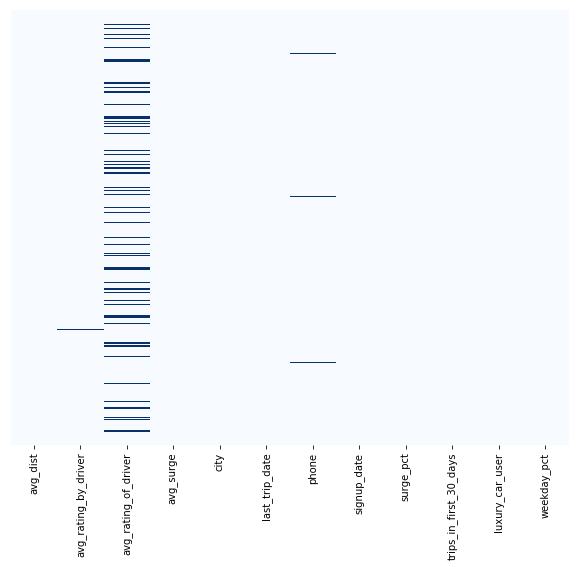

In [98]:
plt.figure(figsize = (10, 8))
sns.heatmap(data_train.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

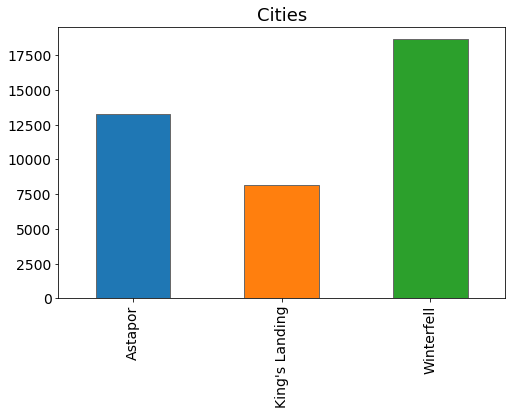

In [99]:
plt.title('Cities', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data_train['city'].value_counts().sort_index().plot.bar(
    figsize = (8,5),
    fontsize = 14, edgecolor='dimgrey')

In [100]:
data_train.phone.value_counts(),  sum(data_train.phone.value_counts())

(iPhone     27628
 Android    12053
 Name: phone, dtype: int64, 39681)

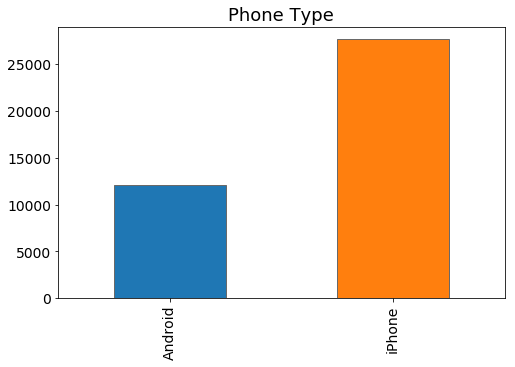

In [101]:
plt.title('Phone Type', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data_train['phone'].value_counts().sort_index().plot.bar(
    figsize = (8,5),
    fontsize = 14, edgecolor='dimgrey')

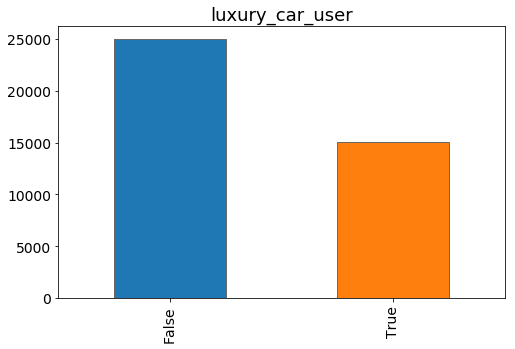

In [102]:
plt.title('luxury_car_user', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data_train['luxury_car_user'].value_counts().sort_index().plot.bar(
    figsize = (8,5),
    fontsize = 14, edgecolor='dimgrey')

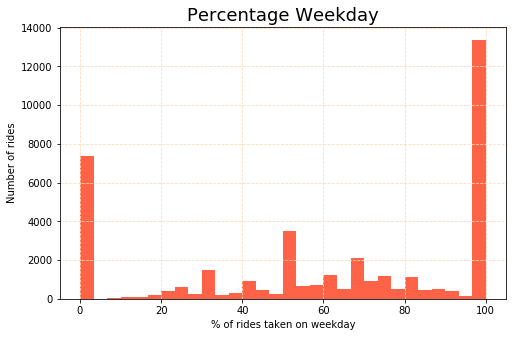

In [103]:
plt.title('Percentage Weekday', fontsize = 18)
plt.grid(c = 'peachpuff', linestyle = '--')
plt.xlabel('% of rides taken on weekday')
plt.ylabel('Number of rides')
data_train['weekday_pct'].hist(bins = 30, figsize = (8,5), color = 'Tomato')


(0, 45)

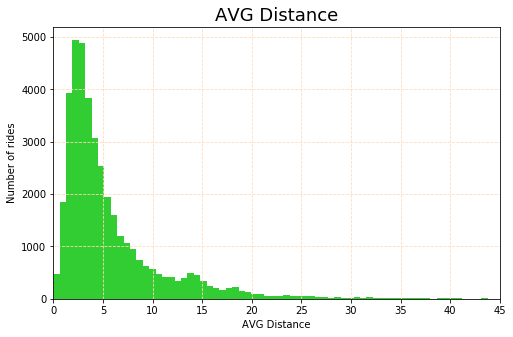

In [104]:
plt.title('AVG Distance', fontsize = 18)
plt.grid(c = 'peachpuff', linestyle = '--')
plt.xlabel('AVG Distance')
plt.ylabel('Number of rides')
data_train['avg_dist'].hist(bins = 250, figsize = (8,5), color = 'Limegreen')
plt.xlim((0, 45)) 

(0, 30)

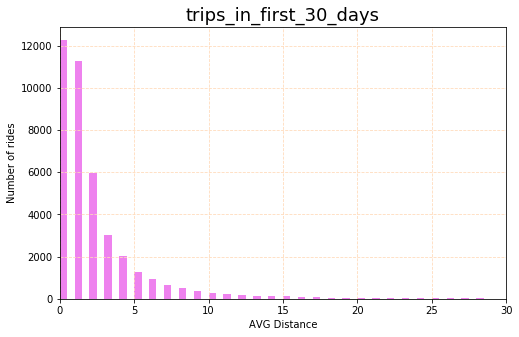

In [105]:
plt.title('trips_in_first_30_days', fontsize = 18)
plt.grid(c = 'peachpuff', linestyle = '--')
plt.xlabel('AVG Distance')
plt.ylabel('Number of rides')
data_train['trips_in_first_30_days'].hist(bins = 250, figsize = (8,5), color = 'Violet')
plt.xlim((0, 30)) 

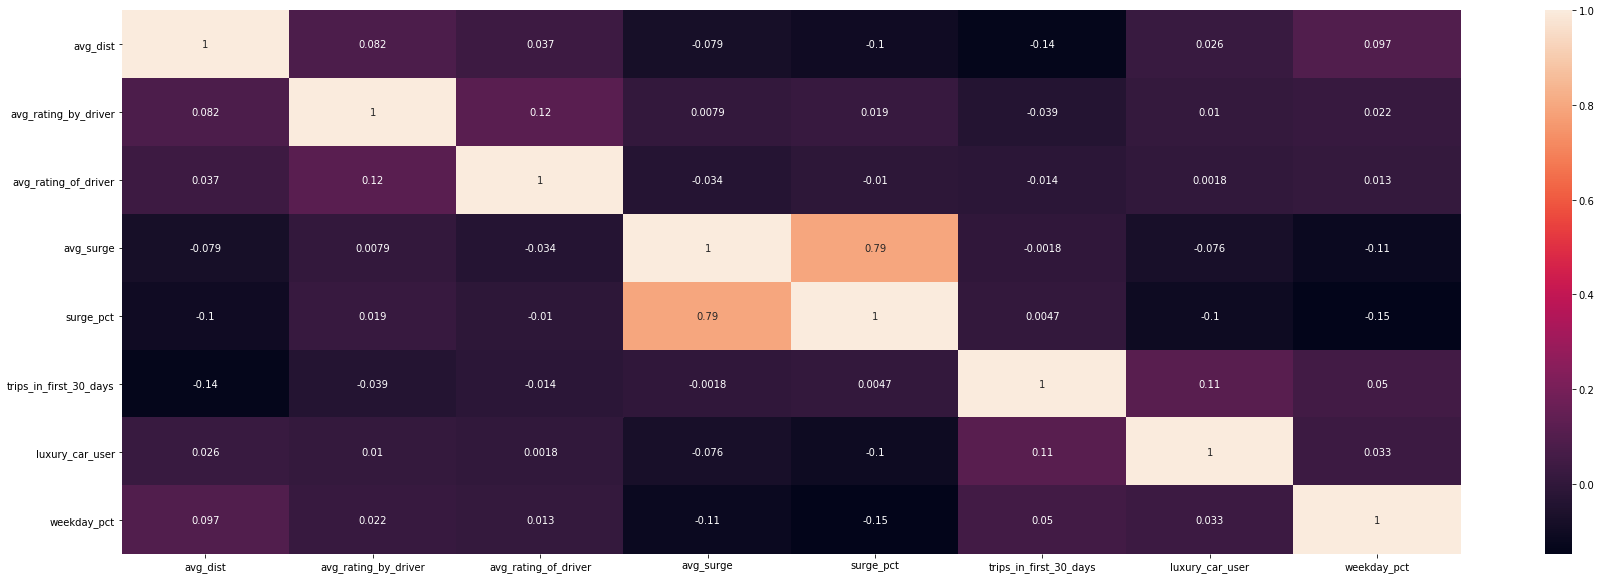

In [106]:
plt.figure(figsize = (30, 10))
sns.heatmap(data_train.corr(), annot = True)

## 2. DATA Cleaning and Handling

### 2.1 Getting Target
Churn would be a customer that did not use the service in 30 days (or specify dif number in f-n)

In [107]:
def get_target(df, days):
    df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])
    cut_off = df['last_trip_date'].dt.date.max() -  pd.to_timedelta(days, unit='d')
    y = (df['last_trip_date'] < cut_off).astype(int)
    return y

In [108]:
def drop_target(df):
    df_copy = df.copy()
    df_copy = df_copy.drop(["last_trip_date"], 1)
    return df_copy

In [109]:
y_train = get_target(data_train, 30)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


In [110]:
data_train.drop('signup_date', axis=1, inplace=True)

### 2.2 Dealing w/categorical data. Creating Dummy Variables

In [111]:
def clean_avg_rating_by_driver(df):
    
    '''
    INPUT: pandas df
    Filling null values w/mean avg_rating
    OUTPUT: 
    '''
    
    df["avg_rating_by_driver"] = df.groupby("city").transform(lambda x: x.fillna(x.mean())).astype(float)
    df["avg_rating_of_driver"] = df.groupby("city").transform(lambda x: x.fillna(x.mean())).astype(float)
    
    return df

In [112]:
data_train  = clean_avg_rating_by_driver(data_train)

In [113]:
def clean_city(df):
    df_copy = df.copy()
    cities = pd.get_dummies(df_copy["city"])[["Astapor", "Winterfell"]]
    df_copy = pd.concat([df_copy, cities], 1)
    df_copy = df_copy.drop(["city"], 1)
    return df_copy

In [114]:
data_train = clean_city(data_train)

In [115]:
def clean_phone(df):
    '''
    INPUT: pandas df
    OUTPUT: df w/dummy variables new columns for phone types
    '''
    df_copy = df.copy()
    phones = pd.get_dummies(df_copy["phone"])[["iPhone"]]
    df_copy = pd.concat([df_copy, phones], 1)
    df_copy = df.drop(["phone"], 1)
    return df_copy


In [116]:
data_train = clean_phone(data_train)

In [117]:
def clean_lux_car(df):
    '''
    INPUT: pandas df
    Function converts Boolean values to binary
    OUTPUT: 
    '''
    df_copy = df.copy()
    df_copy['luxury_car_user'] = df_copy['luxury_car_user'].astype(int)
    return df_copy

In [118]:
data_train = clean_lux_car(data_train)

In [119]:
# dropping last trip date column since we are using it as our target. 
data_train = data_train.drop(["last_trip_date"], 1)

In [120]:
data_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,Winterfell
0,6.94,6.94,6.94,1.00,0.0,0,0,100.0,1,0
1,8.06,8.06,8.06,1.00,0.0,2,1,0.0,1,0
2,21.50,21.50,21.50,1.00,0.0,1,1,100.0,0,1
3,9.46,9.46,9.46,2.75,100.0,1,0,100.0,0,1
4,13.77,13.77,13.77,1.00,0.0,0,0,100.0,0,1


In [121]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null int64
weekday_pct               40000 non-null float64
Astapor                   40000 non-null uint8
Winterfell                40000 non-null uint8
dtypes: float64(6), int64(2), uint8(2)
memory usage: 2.5 MB


## Concat y with X to look at correlations. 

In [122]:
merged_df = pd.concat([data_train, y_train], axis = 1)

# result = pd.concat([dataframe, series], axis=1)

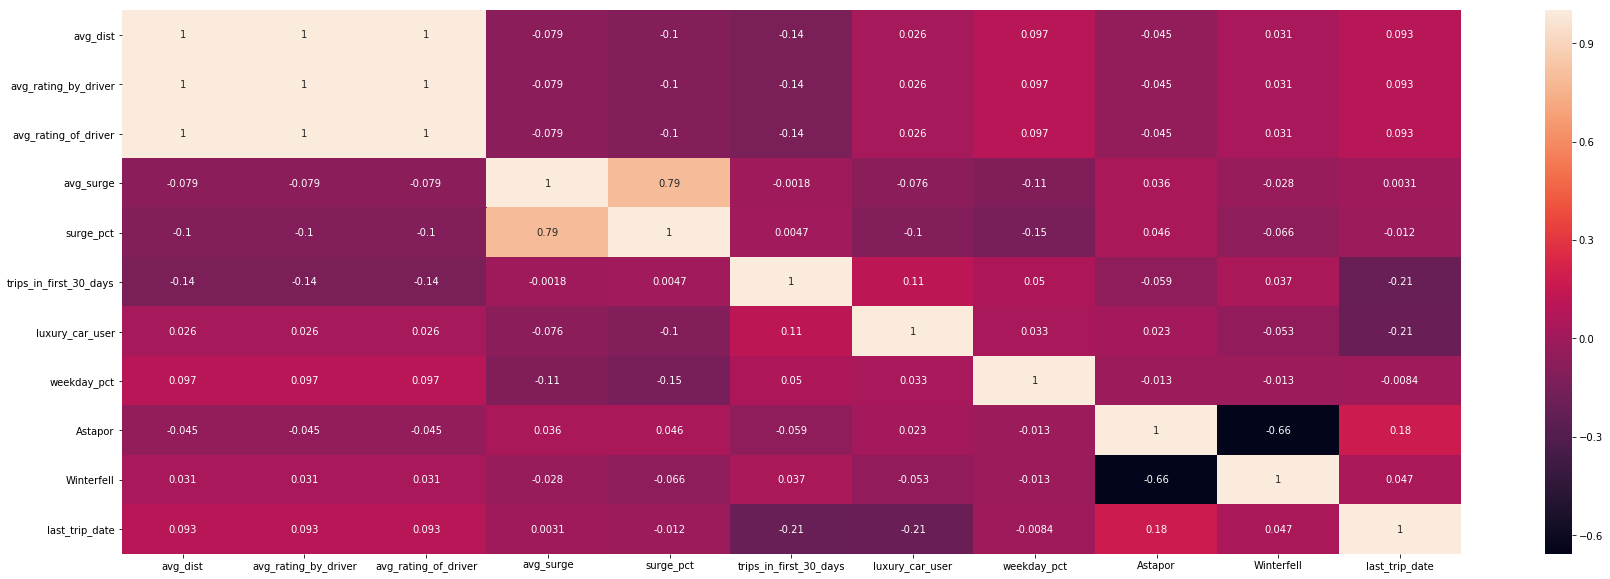

In [123]:
plt.figure(figsize = (30, 10))
sns.heatmap(merged_df.corr(), annot = True)

In [124]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null int64
weekday_pct               40000 non-null float64
Astapor                   40000 non-null uint8
Winterfell                40000 non-null uint8
dtypes: float64(6), int64(2), uint8(2)
memory usage: 2.5 MB


In [125]:
sum(data_train.avg_dist.isnull())

0

## 3. Preparing to train models 

### 3.1 Features and Target

In [126]:
# if __name__ == '__main__':

X = data_train.values
y = y_train 

### 3.2 Train-test split for cross-validation

In [127]:
# setting random state for reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32000, 10), (8000, 10), (32000,), (8000,))

## 4. Models.  Training. Interpretation

### 4.1 Random Forest

In [130]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1, criterion = 'entropy')

#### Random Forest 4.1.1 Model Fitting

In [132]:
### Fitting
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

####  4.1.2 Random Forest Model Evaluation 

In [133]:
y_predict_train = rf.predict(X_train)

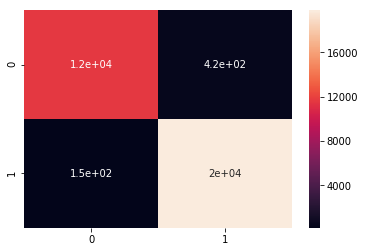

In [135]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot= True)

In [138]:
# Training Results
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     12061
           1       0.98      0.99      0.99     19939

   micro avg       0.98      0.98      0.98     32000
   macro avg       0.98      0.98      0.98     32000
weighted avg       0.98      0.98      0.98     32000



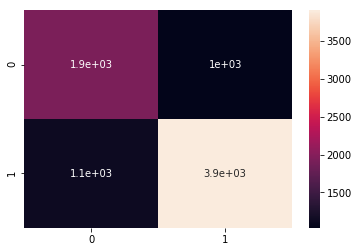

In [144]:
y_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)


In [145]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2971
           1       0.79      0.78      0.78      5029

   micro avg       0.73      0.73      0.73      8000
   macro avg       0.71      0.71      0.71      8000
weighted avg       0.73      0.73      0.73      8000



In [147]:
## Gets cross validated accuracy and AUC for different models

def cross_val_accuracy(X_train, y_train, func):

    acc = sum(cross_val_score(func, X_train, y_train, scoring='accuracy'))/3
    roc = sum(cross_val_score(func, X_train, y_train, scoring='roc_auc'))/3

    func_name = str(func.__class__.__name__)

    print("{0:27} Train CV | Accuracy: {1:5.4} | ROC: {2:5.4}".format(func_name, acc, roc))
    return acc, roc

acc_rf, roc_rf = cross_val_accuracy(X_train, y_train, rf)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier      Train CV | Accuracy: 0.7298 | ROC: 0.7865


### Gradient Boost Classifier

In [148]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, random_state=1)
	# acc_rf, roc_rf = cross_val_accuracy(X_train, y_train, gb)

### ROC AUC Plots

In [149]:
def plot_profit(thresh, profs, title, sv):

    thresh_l = thresh[::20]
    profs_l = profs[::20]

    m_ind = thresh_l[profs_l.index(max(profs_l))]
    print("Max Threshold:", m_ind)

    plt.plot(thresh_l, profs_l, color='red', linestyle='--', label='Profit Curve')
    plt.axvline(m_ind, linestyle='--', color='blue', label='Max at:%.3f'%m_ind)
    plt.title(title)
    plt.xlabel("Probability Threshold")
    plt.ylabel("Profit")
    plt.legend()
    plt.grid()
    plt.savefig(sv)
    plt.show()

In [41]:
	### TESTING RANDOM FORREST VS GRADIENT BOOST ###

	######### RANDOM FORREST #########
	# rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
	# acc_rf, roc_rf = cross_val_accuracy(X_train, y_train, rf)


	######### GRADIENT BOOST #########
	# gb = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, random_state=1)
	# acc_rf, roc_rf = cross_val_accuracy(X_train, y_train, gb)


	### GRADIENT BOOST HIGHER ACCURACY ADN AUC .75 VS .69 ###
	#################################################

	### MOVING FORWARDS WITH GRADIENT BOOST ###

	###### GETTING PROFIT PLOTS #########
	# gdbr.fit(X_train, y_train)
	# get_profit_plots(gdbr, X_test, y_test)
	# acc_gb1, roc_gb1 = cross_val_accuracy(X_train, y_train, gdbr)


	###### PERFORMING GRID SEARCH #########
	#gb_grid(X_train, y_train, X_test, y_test)



	###### FINAL FIT WITH GRID SEARCH PARAMS #########
	## Done with params after gradient boost
	gdbr = GradientBoostingClassifier(learning_rate     =0.1, 
									  loss              ='exponential',
									  max_depth         =5,
									  min_samples_leaf  =2,
									  min_samples_split =2,
									  n_estimators      =100, 
									  random_state      =1)

	gdbr.fit(X, y)
	X_test_f, y_test_f = get_test_data('data/churn_test.csv')

	## Fitting on Final Test Data and Getting Accuracy
	preds = gdbr.predict(X_test_f)
	
	Acc = (sum(preds == y_test_f) / len(y_test_f))
	print("Final Model Accuracy of:", Acc)


	## Creating ROC Plot and getting AUC
	preds_proba = gdbr.predict_proba(X_test_f).T[1]

	auc = roc_auc_score(y_test_f, preds_proba)
	print("Final Model AUC Score:", round(auc, 4))

	fpr, tpr, thresholds = roc_curve( y_test_f, preds_proba )

	plt.plot( fpr, tpr, '--' )
	plt.title("ROC Plot")
	plt.xlabel("False Positive Rate")
	plt.ylabel("True Positive Rate")
	plt.grid()
	plt.savefig("images/roc.jpg")
	plt.show()


	#plot_feat_import(gdbr, churn_t.columns)


NameError: name 'get_test_data' is not defined